# Øving 8: Hypotesetest

Dette er en Jupyter-notatbok. Se i Python-ressursene i venstremenyen i emnet i Blackboard hvis du ikke vet helt hvordan du bruker notatboken! 

**Kortversjon:** dobbeltklikk på en celle for å komme i edit-mode, gjør endringene din og kjør koden i en celle med shift-enter (eller velge play-knappen i vertøylinja over). For å kjøre alt i notatboka kan du trykke shift-enter på alle celler (en etter en), eller gå i menyen for hubben (til venstre) og velge Run-"Run all cells".

## Spørsmål 7: Superlim

**Husk at tallene under ikke er de samme som du har fått!**

Tiden det tar før et superlim fester seg, kan betraktes som en tilfeldig variabel som er normalfordelt med ukjent forventningsverdi på $\mu$ sekunder og et standardavvik på $\sigma=4.1$ sekunder. Produsenten av superlimet påstår at $\mu=30$ sekunder, men Johan mener at festetiden er lengre. 

Johan vil dermed teste 
$H_0: \mu=30$ mot $H_1:\mu>30$.

For å utføre testen vil Johan kjøpe en pakke med $n$ stk. superlim og lime sammen to-og-to klosser samtidig som han holder øye med festetiden. Johan ønsker å utføre en test med signifikansnivå $\alpha=0.1$ og skal dermed forkaste $H_0$ til fordel for$H_1$ dersom han observerer en gjennomsnittlig festetid
$\bar{x}$ over $k=30+z_{0.1} \sigma/\sqrt{n}$ sekunder.

## 7 a) 

Dersom festetiden faktisk er på 33 sekunder, hva blir teststyrken til Johan dersom han kjøper en pakke med  $n=10$ stk. superlim? Oppgi svaret som et desimaltall med to desimaler.

Testmetoden som er oppgitt er at man forkaster nullhypotesen hvis $\bar{x}>k$, der $k$ er en funksjon av 
* verdien til $\mu$ når nullhypotesen er riktig, 
* det kjente standardavviket $\sigma$ og 
* det valge antallet observasjoner $n$ og så 
* det valgte signifikansnivået $\alpha$.

Men, i denne oppgaven er det bare (etter hvert) $n$ vi skal endre på.

La oss starte med å lage en funksjon som heter $k$ og som tar inn $n$ som argument, men inneholder de observerte verdiene våre for de tre andre.

Fra øving 7 husker vi at $z_{\alpha}$ kritisk verdi i standard normalfordeling (tallet i standardnormalfordelingen der det er sannsynlighet $\alpha$ for være større enn).
For å finne $z_{\alpha}$ bruker vi ppf-funksjonen- men er laget for nedre hale. Siden det er øvre hale vi er ute etter må vi regne dette som  $P(Z \leq \text{ppf}(1-\alpha)) = 1-\alpha$.

Under ser du funksjonen k, og denne kan brukes til å regne ut den kritiske verdien $k$ som vi får gitt i oppgaven.

In [1]:
from scipy import stats
import numpy as np

muH0sann=30
sigma=4.1
alpha=0.1
n=10

def k(n):
  return(muH0sann+stats.norm.ppf(1-alpha)*sigma/np.sqrt(n))

dennek=k(n)
print(dennek)

31.661574973290957


Med dataene jeg fikk, skal vi forkaste nullhypotesen hvis gjennomsnittet av de $n$ festetidene er større enn *dennek* verdien for $k$. 

Så til hva det er spurt om: **teststyrken hvis den sanne verdien til festetiden $\mu=33$ sekunder.**

Nå har verden endret seg for oss - vi vet hva forventningsverdien til $\bar{x}$ er - og også standardavviket (sjekk formelarket hvis du har glemt det - så du vet hvor du kan slå opp under eksamen).

Det er kjent at $\bar{X}$ er normalfordelt med forventning $\mu$ og standardavvik $\frac{\sigma}{\sqrt{n}}$, og nå vet vi at denne sanne $\mu=33$.

Da skal vi bare regne ut hva er $P(\bar{X}>k)$ når $\bar{X}$ er normalfordelt med forventning $\mu=33$ og standardavvik $\frac{\sigma}{\sqrt{n}}$. Dette gjør vi ved å bruke *stats.norm.cdf*.

In [2]:
muH1sann=33
print(dennek)

# hvilke av disse to er riktig styrke?
styrke1=stats.norm.cdf(dennek,loc=muH1sann,scale=sigma/np.sqrt(n))
styrke2=1-stats.norm.cdf(dennek,loc=muH1sann,scale=sigma/np.sqrt(n))
print("styrke1=",styrke1)
print("styrke2=",styrke2)

31.661574973290957
styrke1= 0.15096342689531145
styrke2= 0.8490365731046885


Hvilke av disse to styrkene er det riktige svaret? Vi skal se på sannsynligheten for å være større enn $k$ - er det styrke1 eller styrke2? Velg riktig svar og skriv inn i stack.

## 7b) 

Superlim kommer i pakker på 1, 10, 25 og 50 stk. 

Dersom festetiden faktisk er på 33 sekunder, hvilken pakke må Johan kjøpe for at teststyrken skal bli minst $0.92$? Svar 999 om ingen av pakkene er store nok.

Hvis Johan ikke tester $10$ tuber med superlim, men heller et annet tall vil det bety at grensen $k$ for å forkaste nullhypotesen endrer seg. Vi starter med å plotte $k$ som en funksjon av $n$ så vi ser det! Jeg har valgt å plott for $n=1,10,25,50,75$, men det kan du endre på.

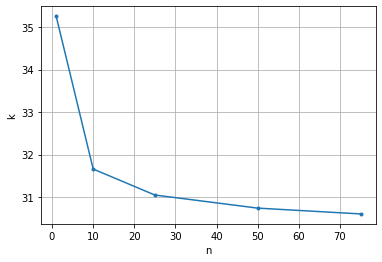

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

from scipy import stats
import numpy as np

muH0sann=30
sigma=4.1
alpha=0.1
n=10

def k(n):
  return(muH0sann+stats.norm.ppf(1-alpha)*sigma/np.sqrt(n))

dennek=k(n)

nverdier=np.array([1.,10.,25.,50.,75.])

fig, ax = plt.subplots()
ax.plot(nverdier, k(nverdier), '.-')
ax.set_xlabel('n')
ax.set_ylabel('k')
ax.grid()
plt.show()

Vi ble spurt om å finne for hvilken verdi av $n$ som vi klarte å få en styrke på minst $0.92$ (du fikk et annet tall). Det betyr at vi må bytte ut verdien av $k$ med funksjonen av $n$ og i tillegg huske at også $n$ inngår i standardavviket til $\bar{X}$.


In [4]:
muH1sann=33
print(nverdier)

for n in nverdier:
    dennek=k(n)
    print(1-stats.norm.cdf(dennek,loc=muH1sann,scale=sigma/np.sqrt(n)))

[ 1. 10. 25. 50. 75.]
0.29121310310564086
0.8490365731046885
0.9912726015109558
0.9999503713922443
0.9999997850521832


Ok, men hva skal du svare på stack? Du skal svare den minste verdien av $n$ slik at styrken er minst $0.92$, og for mine tall ble det oppfylt for $n=25$ - så da er svaret $25$.

# Ekstra

Har du lyst til også å plotte styrken? Da må vi også lage styrken som en funksjon av $n$.

[0.2912131  0.84903657 0.9912726  0.99995037 0.99999979]


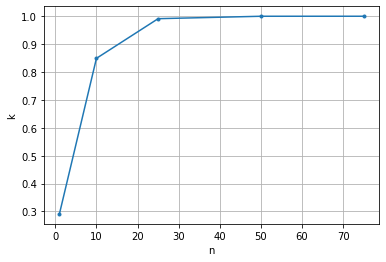

In [5]:
muH1sann=33
muH0sann=30
sigma=4.1

def styrke(n):
    dennek=muH0sann+stats.norm.ppf(1-alpha)*sigma/np.sqrt(n)
    res=1-stats.norm.cdf(dennek,loc=muH1sann,scale=sigma/np.sqrt(n))
    return(res)

print(styrke(nverdier))

fig, ax = plt.subplots()
ax.plot(nverdier, styrke(nverdier), '.-')
ax.set_xlabel('n')
ax.set_ylabel('k')
ax.grid()
plt.show()